# EARTHQUACKE PREDICTION PROBLEM 
IMPORTING OF DIFFERENT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING OF DATA TABLES

In [4]:
df = pd.read_csv('Earthquake Perception Dataset.csv')

In [5]:
df.head()

,age,sex,marital_status,residence,education,occupation,out_of_region_employment,family_members,family_disabilities,house_floor,...,INGV_trust,security,reception_centers,property_house,housing_type,elevator,n_vehicles,vehicle_type,end_of_month,salary
0,21.0,Male,Unmarried,Napoli,Upper Secondary School,Student,No,4,No,1,...,4,2,No,Yes,Apartment,Yes,0,NaN,1,Up to €15000
1,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student,No,5,No,4,...,3,1,No,Yes,Other,Yes,5,Car and Motorcycle,1,Between €28000 and €50000
2,21.0,Female,Unmarried,Napoli,Upper Secondary School,Student Worker,No,5,No,4,...,5,3,Yes,Yes,Apartment,Yes,0,NaN,1,Between €15000 and €28000
3,23.0,Male,Unmarried,Quarto,Upper Secondary School,Student,No,5,No,2,...,1,1,No,No,Apartment,No,2,Car,5,Up to €15000
4,64.0,Female,Unmarried,Somma Vesuviana,Degree,Retired,No,1,No,2,...,4,2,No,No,Apartment,Yes,0,NaN,3,Between €15000 and €28000


In [6]:
df.shape

(472, 43)

DUPLICATION TREATMENT

In [7]:
df.duplicated().sum()

0

NULL VALUE TREATMENT

In [8]:
df.isnull().sum()

age                                16
sex                                 2
marital_status                      0
residence                           4
education                           0
occupation                          0
out_of_region_employment            0
family_members                      0
family_disabilities                 8
house_floor                         0
earthquake80                        0
political_orientation             270
shocks                              0
fear                                0
anxiety                             0
physiological_symptoms              0
decision_timeliness                 0
insomnia                            0
seismic_concern                     0
abroad                              0
out_of_region                       0
out_of_region_earthquake            0
change_of_residence                 0
change_of_residence_earthquake      0
red_zone_frequency                  0
radio_info                          0
TV_info     

In [10]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['sex'].fillna('Female', inplace=True)
df['residence'].fillna('Napoli', inplace=True)
df['political_orientation'].fillna('Left', inplace=True)
df['vehicle_type'].fillna('Car', inplace=True)
df['salary'].fillna('Up to €15000', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             472 non-null    float64
 1   sex                             472 non-null    object 
 2   marital_status                  472 non-null    object 
 3   residence                       472 non-null    object 
 4   education                       472 non-null    object 
 5   occupation                      472 non-null    object 
 6   out_of_region_employment        472 non-null    object 
 7   family_members                  472 non-null    object 
 8   family_disabilities             464 non-null    object 
 9   house_floor                     472 non-null    object 
 10  earthquake80                    472 non-null    object 
 11  political_orientation           472 non-null    object 
 12  shocks                          472 

CONVERTING EARTHQUACK POSSIILITY YES-1 & NO-0

In [12]:
df['earthquake80'] = df['earthquake80'].replace({'Yes': 1, 'No': 0})

In [13]:
df['earthquake80'].value_counts()

earthquake80
0    310
1    162
Name: count, dtype: int64

SEPARATE THE NON OBJECT COLUMNS FROM OBJECT COLUMNS

In [14]:
# Select object data type columns
df1 = df.select_dtypes(include=['object'])

# Select non-object data type columns
df = df.select_dtypes(exclude=['object'])

print("df1:")
print(df1)
print("\ndf:")
print(df)

df1:
        sex marital_status        residence               education  \
0      Male      Unmarried           Napoli  Upper Secondary School   
1    Female      Unmarried           Napoli  Upper Secondary School   
2    Female      Unmarried           Napoli  Upper Secondary School   
3      Male      Unmarried           Quarto  Upper Secondary School   
4    Female      Unmarried  Somma Vesuviana                  Degree   
..      ...            ...              ...                     ...   
467    Male      Unmarried          Caserta                  Degree   
468  Female      Unmarried          Cercola  Lower Secondary School   
469  Female      Unmarried         Pozzuoli                  Degree   
470  Female     Cohabiting         Pozzuoli     Postgraduate Degree   
471  Female        Married        Gualtieri                  Degree   

         occupation out_of_region_employment family_members  \
0           Student                       No              4   
1           Stud

DEFINING THE FEATURES & VARIABLES

In [15]:
X = df.drop(columns='earthquake80')
y = df['earthquake80']

In [16]:
X

,age,shocks,fear,anxiety,physiological_symptoms,decision_timeliness,insomnia,seismic_concern,radio_info,TV_info,social_media_info,newspaper_info,app_info,municipal_institutions_trust,regional_institutions_trust,national_institutions_trust,INGV_trust,security,n_vehicles,end_of_month
0,21.000000,3,2,2,2,3,1,2,3,4,2,4,4,3,3,3,4,2,0,1
1,21.000000,1,2,2,1,3,2,4,3,2,2,2,2,2,2,2,3,1,5,1
2,21.000000,3,2,2,1,4,2,3,2,2,2,2,2,2,2,2,5,3,0,1
3,23.000000,3,3,3,3,1,3,4,1,1,1,1,1,1,1,1,1,1,2,5
4,64.000000,4,4,4,3,2,3,4,3,3,3,3,3,2,3,2,4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,25.000000,3,3,3,1,2,2,4,5,5,5,5,5,2,2,2,3,3,3,3
468,38.872807,2,4,4,3,3,2,4,3,3,3,3,3,3,3,3,3,2,1,3
469,45.000000,2,1,2,2,4,2,3,1,1,3,2,2,2,3,3,3,3,1,1
470,44.000000,3,3,4,2,2,4,4,3,3,4,3,3,3,3,2,4,2,2,2


In [17]:
y

0      0
1      0
2      0
3      0
4      1
      ..
467    0
468    0
469    0
470    0
471    0
Name: earthquake80, Length: 472, dtype: int64

SAMPLING

In [45]:
# importing the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
X.shape, X_train.shape, X_test.shape,y.shape,y_train.shape,y_test.shape

((472, 20), (377, 20), (95, 20), (472,), (377,), (95,))

MODEL FITTING

In [46]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

ACCURACY SCORE PREDICTION FOR TRAIN DATA

In [48]:
# accuracy on training data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_prediction)
print(training_data_accuracy)

0.9177718832891246


In [49]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  91.78 %


In [50]:
cf_matrix = confusion_matrix(y_train,y_train_prediction)

print(cf_matrix)

[[235  13]
 [ 18 111]]


<Axes: >

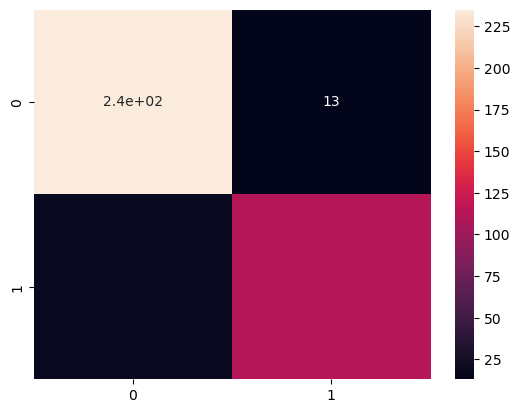

In [51]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ACCURACY SCORE PREDICTION FOR TEST DATA

In [52]:
# accuracy on training data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_prediction)
print(test_data_accuracy)

0.8315789473684211


In [53]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  83.16 %


In [54]:
cf_matrix = confusion_matrix(y_test,y_test_prediction)

print(cf_matrix)

[[53  9]
 [ 7 26]]


CLASSIFICATION REPORT FOR TRAIN DATA

In [55]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       248
           1       0.90      0.86      0.88       129

    accuracy                           0.92       377
   macro avg       0.91      0.90      0.91       377
weighted avg       0.92      0.92      0.92       377



CLASSIFICATION REPORT FOR TEST DATA

In [56]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        62
           1       0.74      0.79      0.76        33

    accuracy                           0.83        95
   macro avg       0.81      0.82      0.82        95
weighted avg       0.83      0.83      0.83        95



In [ ]:
From the above study it is found that earthquacke prediction is 83%

*********************************************************DONE********************************************************